<a href="https://colab.research.google.com/github/ebythomas23/Employee_Turnover_Prediction/blob/main/notebooks/01_end_to_end.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Libraries and Loading Data
We start by importing the necessary libraries: 
- `pandas` and `numpy` for data manipulation and analysis.

We then load the dataset containing employee information to predict turnover. The dataset is loaded into a DataFrame named `employee_data`.


In [486]:
import pandas as pd
import numpy as np

In [487]:
employee_data = pd.read_csv('/Users/ebythomas/Documents/GitHub/Employee_Turnover_Prediction/Dataset/HR.csv')

## Checking the Data
To understand the structure of the dataset, we:
- Use `.head()` to view the first few rows.
- Use `.describe()` for basic statistical details.
- Use `.info()` to check data types and missing values.

### Key Observations:
- The dataset has **14999 rows** and **10 columns**.
- **8 columns** are numeric, while **2 columns** (`sales` and `salary`) are categorical.
- There are **no missing values**.
- The target variable is **`left`**, where:
  - `0`: Employee stayed
  - `1`: Employee left the organization


In [488]:
employee_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [489]:
employee_data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [490]:
employee_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Key Observations:
- The dataset has **14999 rows** and **10 columns**.
- **8 columns** are numeric, while **2 columns** (`sales` and `salary`) are categorical.
- There are **no missing values**.
- The target variable is **`left`**, where:
  - `0`: Employee stayed
  - `1`: Employee left the organization

In [491]:
employee_data.shape


(14999, 10)

checking the lsbel columns

In [492]:
employee_data['left'].value_counts()

left
0    11428
1     3571
Name: count, dtype: int64

## Splitting the Data
We separate the dataset into **features** and **target**:
- `X`: All features excluding the target (`left`).
- `y`: The target variable (`left`) indicating if an employee left the company.

### Train-Test Split:
- We split the data into **training** and **testing** sets using `train_test_split()` from scikit-learn.
- **80%** of the data is used for training and **20%** for testing.
- `random_state=42` is used to ensure reproducibility of the results.


- The **test set** is kept aside to evaluate the model's performance on unseen data.

In [493]:
X = employee_data.drop(columns='left', inplace=False)
y = employee_data['left'].copy()

In [494]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

## Data Preprocessing
### Handling Categorical Data
- **`sales` Column**: One-Hot Encoded to convert categories into binary columns.


In [495]:
sales_data = X_train[["sales"]]
sales_data.head()


,sales
9838,product_mng
7689,technical
6557,RandD
6872,accounting
820,technical


In [496]:
sales_data.value_counts()


sales      
sales          3317
technical      2173
support        1766
IT              976
product_mng     744
marketing       669
accounting      632
RandD           620
hr              582
management      520
Name: count, dtype: int64

In [497]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder(sparse_output=False)
sales_data_1hot = cat_encoder.fit_transform(sales_data)

In [498]:
sales_data_1hot

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], shape=(11999, 10))

In [499]:
cat_encoder.categories_

[array(['IT', 'RandD', 'accounting', 'hr', 'management', 'marketing',
        'product_mng', 'sales', 'support', 'technical'], dtype=object)]

In [500]:
sales_data_1hot_output =pd.DataFrame(sales_data_1hot
                                     ,index=sales_data.index)

In [501]:
sales_data_1hot_output.head()

,0,1,2,3,4,5,6,7,8,9
9838,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7689,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6557,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6872,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
820,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


- The `sales` column is now represented as **10 binary columns**, one for each category.


Used **Ordinal Encoding** for the `salary` column as it has a natural order: `low < medium < high`.
- Mapped categories as:
  - `low → 0`
  - `medium → 1`
  - `high → 2`




In [502]:
salary_data = X_train[["salary"]]
salary_data.head()


,salary
9838,low
7689,high
6557,medium
6872,medium
820,low


In [503]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
salary_data_encoded = ordinal_encoder.fit_transform(salary_data)

In [504]:
salary_data_encoded_output = pd.DataFrame(salary_data_encoded, columns=salary_data.columns, index=salary_data.index)

In [505]:
salary_data_encoded_output.head()

,salary
9838,1.0
7689,0.0
6557,2.0
6872,2.0
820,1.0



- The `salary` column is now represented as **numeric values** preserving the ordinal relationship.

In [506]:
employee_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Scaling Numerical Features
- Scaled the numerical columns to make sure they're on the same scale.
- Used **StandardScaler** to adjust the values so they have a **mean of 0** and a **standard deviation of 1**.
- This helps the model learn better and faster.

### Why We Did This:
- Machine learning models perform better when features are on a similar scale.
- It also speeds up the learning process and ensures no feature dominates because of its range.



In [507]:
employee_data_num =X_train.select_dtypes(include=[np.number])

In [508]:
employee_data_num.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
9838,1.00,0.61,3,188,4,0,0
7689,0.16,0.78,4,196,5,0,0
6557,0.80,0.80,3,175,2,0,0
6872,0.66,0.86,4,112,6,0,0
820,0.11,0.93,7,284,4,0,0


In [509]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
employee_data_num_scaled = std_scaler.fit_transform(employee_data_num)

In [510]:
scaled_num_df = pd.DataFrame(employee_data_num_scaled, columns=employee_data_num.columns)

Plotted histograms show the **before and after** of scaling

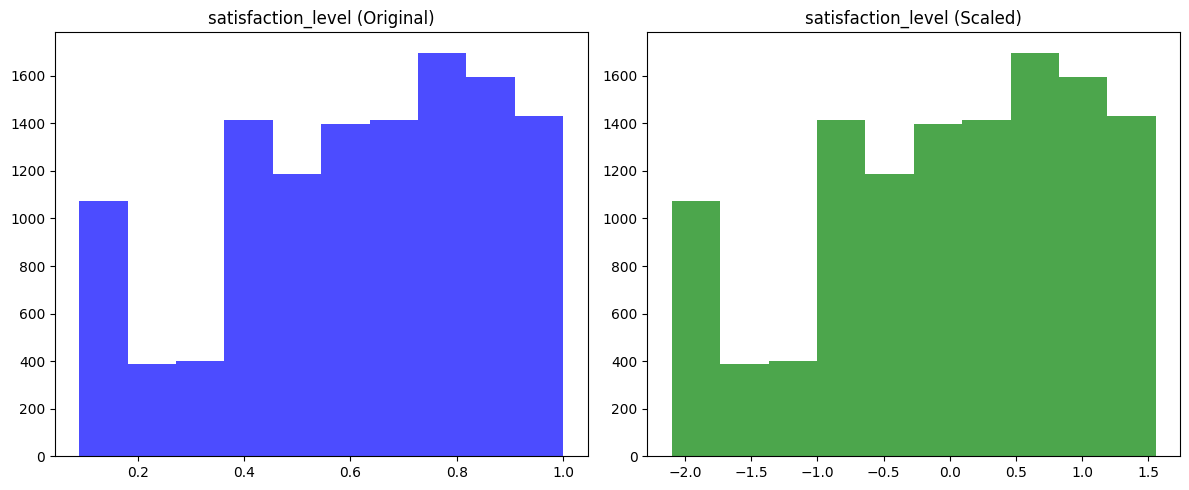

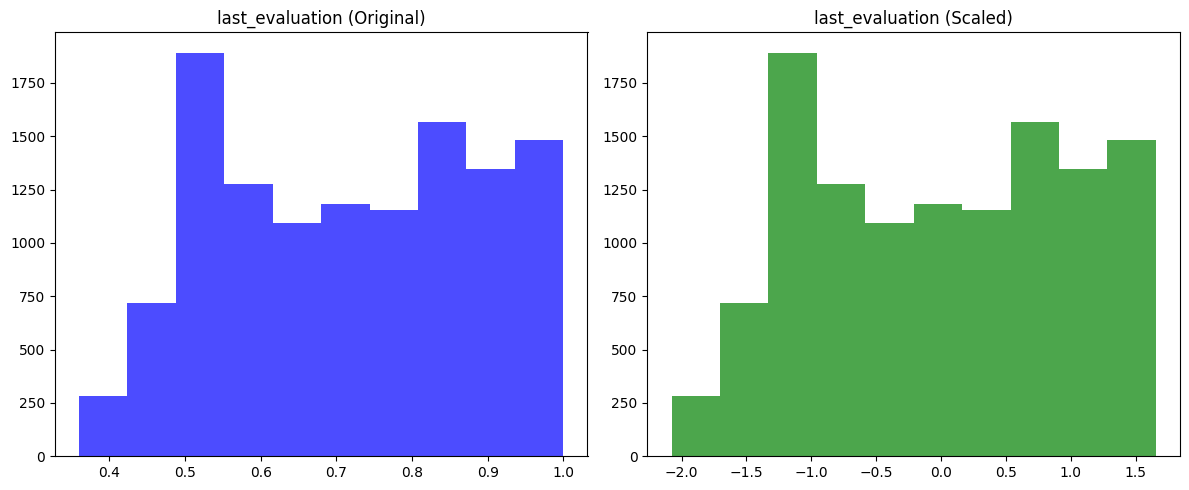

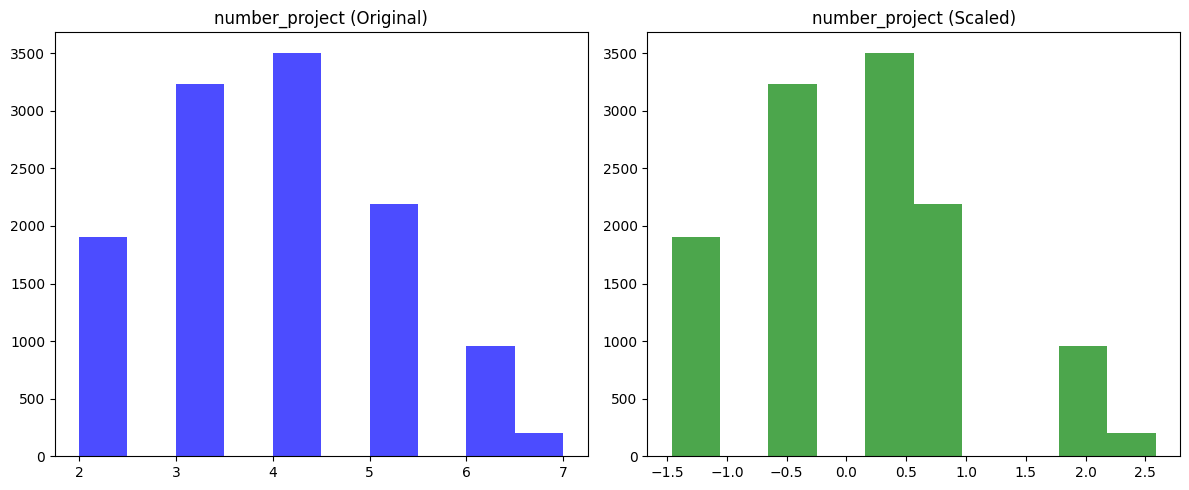

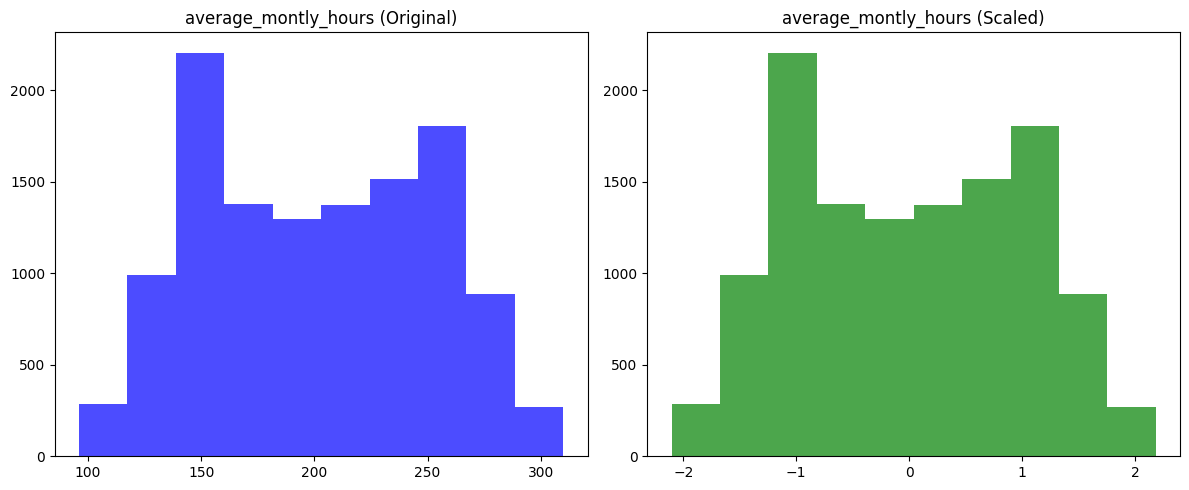

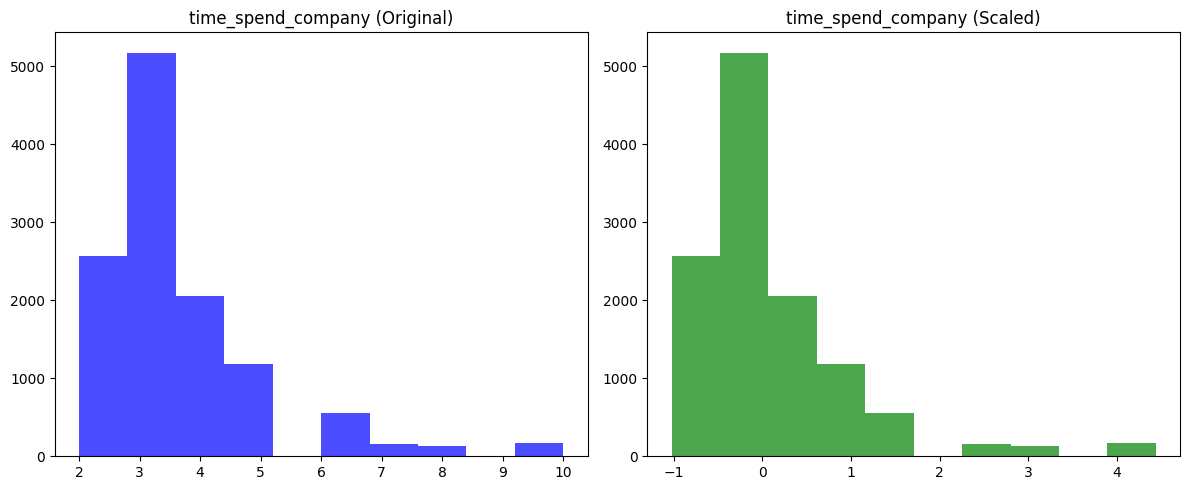

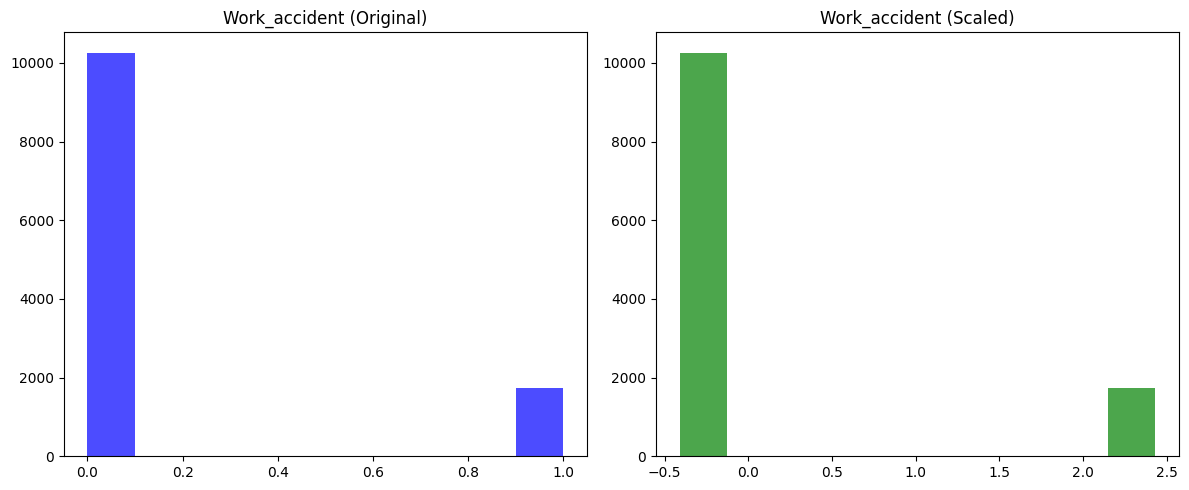

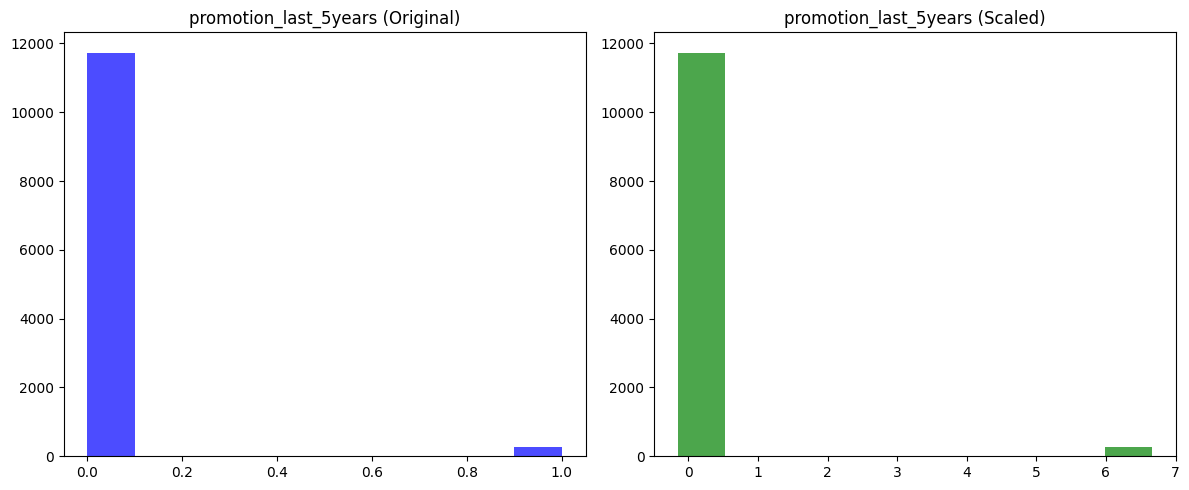

In [511]:
import matplotlib.pyplot as plt

# Plotting histograms for each column
for col in  scaled_num_df.columns:
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.title(f"{col} (Original)")
    plt.hist(X_train[col], bins=10, color='blue', alpha=0.7)
    
    plt.subplot(1, 2, 2)
    plt.title(f"{col} (Scaled)")
    plt.hist(scaled_num_df[col], bins=10, color='green', alpha=0.7)
    
    plt.tight_layout()
    plt.show()




### Building the Preprocessing Pipeline
We’re organizing all the data preprocessing steps into one pipeline for cleaner and more efficient code.

 - **Numerical Columns**: Scaled using `StandardScaler`.
  - **`salary` Column**: Ordinal Encoded (`low < medium < high`).
  - **`sales` Column**: One-Hot Encoded to handle multiple categories.



In [512]:
from sklearn.pipeline import make_pipeline, Pipeline

num_attribs = ['satisfaction_level'	,'last_evaluation'	,'number_project'	
               ,'average_montly_hours'	,'time_spend_company'	
               ,'Work_accident'	,'promotion_last_5years']
cat_attribs1 =['salary']
cat_attribs2 =['sales']
num_pipeline= make_pipeline(StandardScaler())
salary_pipeline= make_pipeline(OrdinalEncoder())
sales_pipeline= make_pipeline(OneHotEncoder(sparse_output=False))


### Using ColumnTransformer

now we use a column tranformer to tranform all operations in a single step to the data 

In [513]:
from sklearn.compose import ColumnTransformer
preprocessing = ColumnTransformer(
    [
        ('num',num_pipeline,num_attribs),
        ('salary',salary_pipeline,cat_attribs1),
        ('sales',sales_pipeline,cat_attribs2)
    ]
)

In [514]:
preprocessing


ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 ['satisfaction_level', 'last_evaluation',
                                  'number_project', 'average_montly_hours',
                                  'time_spend_company', 'Work_accident',
                                  'promotion_last_5years']),
                                ('salary',
                                 Pipeline(steps=[('ordinalencoder',
                                                  OrdinalEncoder())]),
                                 ['salary']),
                                ('sales',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(sparse_output=False))]),
                                 ['sales'])])

### Feature Selection
We’re using **Recursive Feature Elimination (RFE)** to select the most important features for predicting employee turnover.

- It works by recursively removing the least important features and building the model again.
- We’re using `LogisticRegression` as the base model because it’s simple and interpretable.
- The goal is to select about **10 of the most relevant features** from the dataset.

This helps in reducing noise and improving model accuracy.



In [515]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
feature_selection = Pipeline([
                        
                     ("feature_selection" ,RFE(LogisticRegression(),n_features_to_select=10))])




### Logistic Regression
We’re training a **Logistic Regression** model to predict employee turnover. 

- This model is chosen for its simplicity and interpretability.
- It’s integrated with the full pipeline, which includes all preprocessing and feature selection steps.


In [516]:
log_reg = make_pipeline(preprocessing,feature_selection,LogisticRegression())

log_reg.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['satisfaction_level',
                                                   'last_evaluation',
                                                   'number_project',
                                                   'average_montly_hours',
                                                   'time_spend_company',
                                                   'Work_accident',
                                                   'promotion_last_5years']),
                                                 ('salary',
                                                  Pipeline(steps=[('ordinalencoder',
                                                                   OrdinalEncoder())]),
                                                  ['salary']),
                                                 ('sales',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(sparse_output=False))]),
                                                  ['sales'])])),
                ('pipeline',
                 Pipeline(steps=[('feature_selection',
                                  RFE(estimator=LogisticRegression(),
                                      n_features_to_select=10))])),
                ('logisticregression', LogisticRegression())])

#### Evaluating on Training Data
lets test it on train data 

In [517]:
y_pred = log_reg.predict(X_train)

now we will check the accuracy score

In [518]:
from sklearn.metrics import accuracy_score

print('Logistic regression accuracy in train data:',accuracy_score(y_train,y_pred))

Logistic regression accuracy in train data: 0.7668972414367864


- Accuracy on training data: **~76.7%**

#### Evaluating on Test Data

In [533]:
y_pred = log_reg.predict(X_test)
print('Logistic regression accuracy ',accuracy_score(y_test,y_pred))

Logistic regression accuracy  0.7556666666666667


- Accuracy on test data: **~75.6%**

### Random Forest Classification Model



In [521]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = make_pipeline(preprocessing, 
                       feature_selection,
                       RandomForestClassifier(random_state=42)
                       
                       )
rf_clf.fit(X_train,y_train)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['satisfaction_level',
                                                   'last_evaluation',
                                                   'number_project',
                                                   'average_montly_hours',
                                                   'time_spend_company',
                                                   'Work_accident',
                                                   'promotion_last_5years']),
                                                 ('salary',
                                                  Pipeline(steps=[('ordinalencoder',
                                                                   OrdinalEncoder())]),
                                                  ['salary']),
                                                 ('sales',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(sparse_output=False))]),
                                                  ['sales'])])),
                ('pipeline',
                 Pipeline(steps=[('feature_selection',
                                  RFE(estimator=LogisticRegression(),
                                      n_features_to_select=10))])),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

#### Testing on train data 

In [522]:
rf_ypred = rf_clf.predict(X_train)



In [523]:
print('Random Forest accuracy in train data:',accuracy_score(y_train,rf_ypred))

Random Forest accuracy in train data: 0.9994999583298608


- Accuracy on training data: **~99.9%** 
- High accuracy, but it might be overfitting.

#### Evaluating on Test Data

In [534]:
rf_y_pred = rf_clf.predict(X_test)

print('Random Forest accuracy ',accuracy_score(y_test,rf_y_pred))

Random Forest accuracy  0.987


- Accuracy on test data: **~98.7%**
- Performs well on unseen data, indicating good generalization.

thats it , we got best results of 98 % accuracy by random forest model

### Confusion Matrix for our Machine Learning Models:


Now I will construct a confusion matrix to visualize predictions made by our classifier and evaluation of the accuracy of our machine learning classification.

##### Random forest 

In [525]:
from sklearn.metrics import classification_report

print(classification_report(y_test,rf_y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2294
           1       0.98      0.96      0.97       706

    accuracy                           0.99      3000
   macro avg       0.99      0.98      0.98      3000
weighted avg       0.99      0.99      0.99      3000



Text(0.5, 1.0, 'Random Forest')

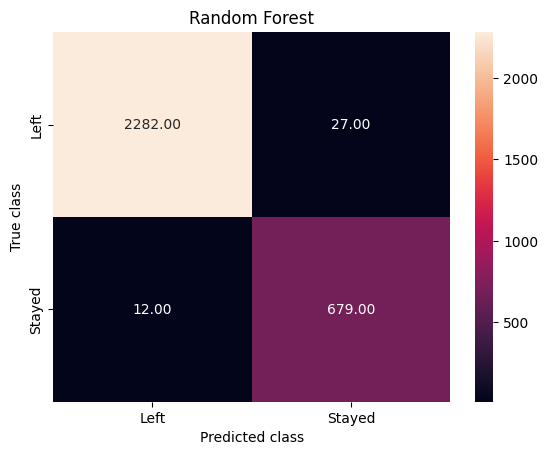

In [526]:
from sklearn.metrics import confusion_matrix
import seaborn as sns 
foresst_cm = confusion_matrix(rf_y_pred,y_test)
sns.heatmap(foresst_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Random Forest')


##### Logistic Regression

In [541]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.92      0.85      2294
           1       0.46      0.23      0.31       706

    accuracy                           0.76      3000
   macro avg       0.63      0.57      0.58      3000
weighted avg       0.72      0.76      0.72      3000



Text(0.5, 1.0, 'Logistic Regression')

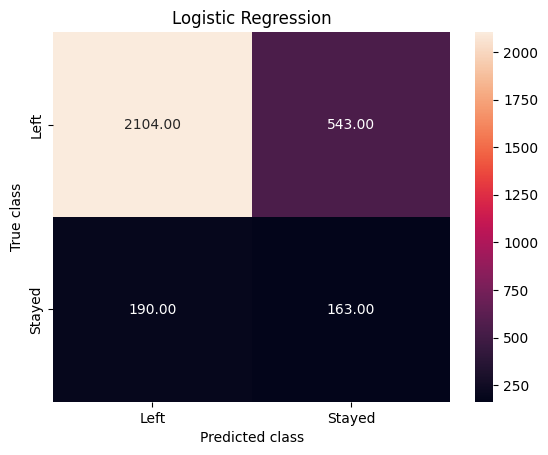

In [542]:
logreg_cm = confusion_matrix(y_pred,y_test)
sns.heatmap(logreg_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Logistic Regression')

#### ROC Curve 
The receiver operating characteristic (ROC) curve is a standard tool used with binary classifiers. The red dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).


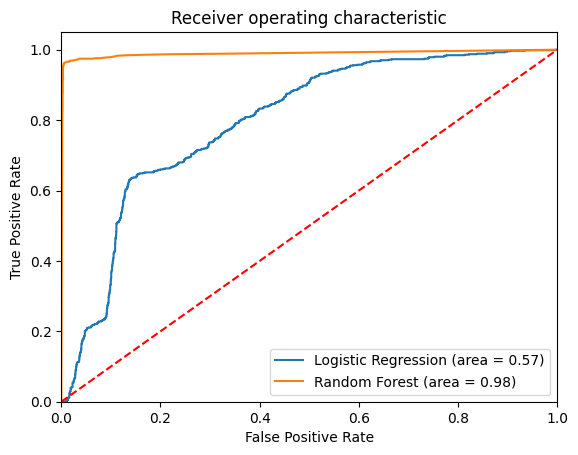

In [543]:
from sklearn.metrics import roc_auc_score, roc_curve

logit_roc_auc = roc_auc_score(y_test,y_pred)
fpr,tpr,thresholds = roc_curve(y_test,log_reg.predict_proba(X_test)[:,1])
rf_roc_auc = roc_auc_score(y_test,rf_y_pred)
rf_fpr,rf_tpr,rf_thresholds = roc_curve(y_test,rf_clf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


So, as we can see that the Random Forest Model has proven to be more useful in the prediction of employee turnover, now let’s have a look at the feature importance of our random forest classification model.

In [544]:
rf_clf.named_steps["randomforestclassifier"]

RandomForestClassifier(random_state=42)

note : below all_feature_names attribute contains all features ,but only 10 features out of it will proceeded to the model , since we do top 10 best feature selection

In [545]:
all_feature_names = preprocessing.get_feature_names_out()
all_feature_names

array(['num__satisfaction_level', 'num__last_evaluation',
       'num__number_project', 'num__average_montly_hours',
       'num__time_spend_company', 'num__Work_accident',
       'num__promotion_last_5years', 'salary__salary', 'sales__sales_IT',
       'sales__sales_RandD', 'sales__sales_accounting', 'sales__sales_hr',
       'sales__sales_management', 'sales__sales_marketing',
       'sales__sales_product_mng', 'sales__sales_sales',
       'sales__sales_support', 'sales__sales_technical'], dtype=object)

In [546]:
for score , name  in zip(rf_clf.named_steps["randomforestclassifier"].feature_importances_, all_feature_names):
    print(name ,"       :",round(score,7)*100,"%" )

num__satisfaction_level        : 38.803670000000004 %
num__last_evaluation        : 19.56853 %
num__number_project        : 18.48999 %
num__average_montly_hours        : 21.02727 %
num__time_spend_company        : 1.12655 %
num__Work_accident        : 0.21012 %
num__promotion_last_5years        : 0.18892 %
salary__salary        : 0.20178000000000001 %
sales__sales_IT        : 0.17968 %
sales__sales_RandD        : 0.2035 %


### Results and Conclusion

Above we visualised the performance of our models using the confusion matrix and evaluating the classification metrics like precision, recall, and F1-score.

---

#### Random Forest

- The Random Forest model shows high accuracy with balanced precision, recall, and F1-score for both classes.
- The confusion matrix confirms minimal misclassification.

---

#### Logistic Regression

- Logistic Regression performs moderately well but shows lower recall for class 1 (employees who left).
- The confusion matrix indicates more false negatives compared to Random Forest.

---

#### ROC Curve

- The ROC curve compares model performance by plotting True Positive Rate vs. False Positive Rate.
- Random Forest shows a significantly higher AUC (0.98) compared to Logistic Regression (0.57), highlighting its superior performance.

---

#### Feature Importance

- We examine feature importance to understand which variables impact employee turnover prediction.
- Top features include `satisfaction_level`, `average_montly_hours `, and `number_project`.
- These insights help in making informed business decisions.
